# 가설4 시험폐지 후 창체활동이 늘었을까? 
- -> 창체 4가지 활동 중 동아리 활동 현황 분석
## 창체활동-동아리 가입 증가수 데이터전처리
### 변수설정
- df_time :서울시 연도/학교유형별 창의적 체험활동(창체) 주당수업시수
- df_time_total : 서울시 연도별 창체 주당수업시수
- corr : 2012~2018년 창체 주당수업시수 -->전처리용
- df_club# : 2012년부터 2018년까지 동아리가입 df-오름차순 (예. df_club1= 2012년도 동아리가입현황)
- group : 전처리 후 연도별로 concat -->전처리용 
- sex : 남녀/전체 동아리 가입비율 -->전처리용 
- sex_total : 전체 합계 동아리 가입비율 
- sex_male_female : 남/녀 동아리 가입비율 
- raw : 연도별 창체 수업연수와 동아리가입비율 상관관계
- school : 학교유형별 동아리가입비율 -->전처리용 
- school_special : 고등학교유형별 동아리가입비율 
- economic : 경제수준별 
- region : 지역규모분류별 -->전처리용
- region_city : 대도시와 중소도시 동아리가입비율 
- region_rural : 대도시와 읍/면 동아리가입비율
- familytype : 가정유형형태 -->전처리용 
- familytype_single : 양부모가정과 한부모가정의 동아리가입비율
- familytype_grandparents : 양부모가정과 조손가정 동아리가입비율

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import datetime as dt
from dateutil.parser import parse

In [2]:
#컬럼 디스플레이 최대로 보이기
pd.options.display.max_columns = None

# 데이터가공 및 시각화

## 창의적 체험활동 연도별 증가 데이터

In [3]:
#데이터불러오기
df_time = pd.read_csv("미니&미드플젝 data/2012-2022 교원의 주당 창의적체험활동시수 -service.csv")
df_time

,교원의 주당 창의적체험활동 수업시수,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,1) 조사기준일 : 해당연도 4월 1일,NaN,NaN,NaN
1,"2) 교원(기간제 포함)은 수석교사, 보직교사, 교사, 특수교사, 실기교사이며, 휴...",NaN,NaN,NaN
2,연도,시도,학교급,교원의 주당 창의적체험활동 수업시수
3,2012,서울,초등학교,1.22773
4,2012,서울,중학교,0.76502
5,2012,서울,고등학교,0.61068
6,2012,서울,전체,0.89541
7,2013,서울,초등학교,2.02041
8,2013,서울,중학교,1.05075
9,2013,서울,고등학교,0.85654


In [4]:
df_time.columns = ['연도','시도','학교급','교원의 주당 창의적체험활동 수업시수']

In [5]:
df_time=df_time.iloc[3:]
df_time=df_time.reset_index(drop=True)
df_time

,연도,시도,학교급,교원의 주당 창의적체험활동 수업시수
0,2012,서울,초등학교,1.22773
1,2012,서울,중학교,0.76502
2,2012,서울,고등학교,0.61068
3,2012,서울,전체,0.89541
4,2013,서울,초등학교,2.02041
5,2013,서울,중학교,1.05075
6,2013,서울,고등학교,0.85654
7,2013,서울,전체,1.36703
8,2014,서울,초등학교,2.02675
9,2014,서울,중학교,1.18103


In [6]:
df_time.info()
df_time["교원의 주당 창의적체험활동 수업시수"] = pd.to_numeric(df_time["교원의 주당 창의적체험활동 수업시수"], errors="coerce")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   연도                   44 non-null     object
 1   시도                   44 non-null     object
 2   학교급                  44 non-null     object
 3   교원의 주당 창의적체험활동 수업시수  44 non-null     object
dtypes: object(4)
memory usage: 1.5+ KB


### 서울시 연도별 창체 시간 시각화

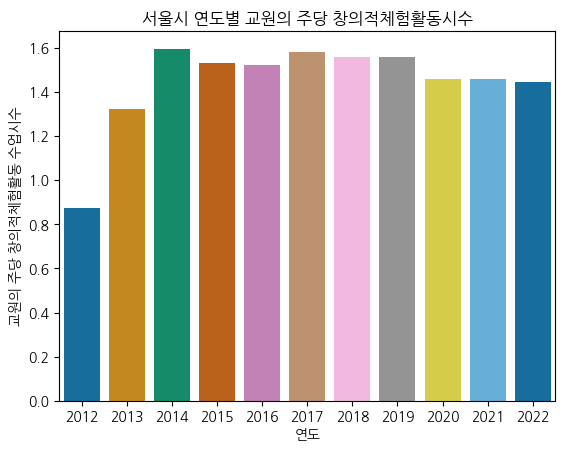

In [7]:
#서울시 연도별 창체시간 df_time_total 변수지정
df_time_total=df_time[df_time["학교급"]=="전체"]
sns.barplot(data=df_time, x="연도", y="교원의 주당 창의적체험활동 수업시수", palette = sns.color_palette("colorblind"), ci=None)
plt.title("서울시 연도별 교원의 주당 창의적체험활동시수")
plt.show()

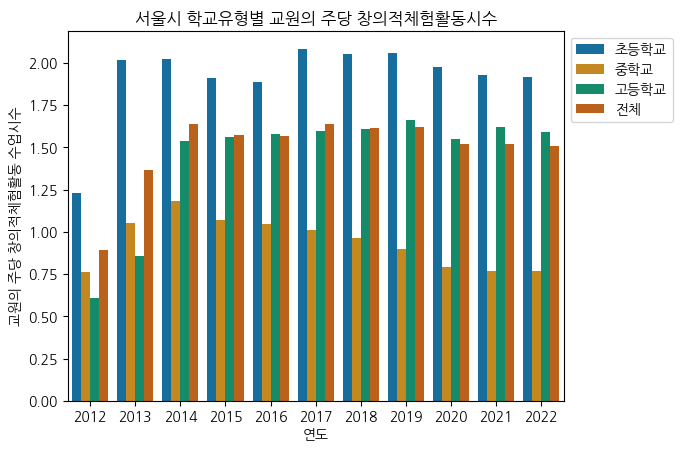

In [8]:
#서울시 연도/학교유형별 창체시간
sns.barplot(data=df_time, x="연도", y="교원의 주당 창의적체험활동 수업시수", hue="학교급", palette = sns.color_palette("colorblind"), ci=None)
plt.title("서울시 학교유형별 교원의 주당 창의적체험활동시수")
plt.legend(bbox_to_anchor = (1,1))
plt.show()

## 창의적 재량활동 중 동아리 가입비율 데이터 

In [9]:
#데이터불러오기 2012~2018 년까지
df_club1 = pd.read_csv("미니&미드플젝 data/2012.csv",encoding="cp949")
df_club2 = pd.read_csv("미니&미드플젝 data/2013.csv",encoding="cp949")
df_club3 = pd.read_csv("미니&미드플젝 data/2014.csv",encoding="cp949")
df_club4 = pd.read_csv("미니&미드플젝 data/2015.csv",encoding="cp949")
df_club5 = pd.read_csv("미니&미드플젝 data/2016.csv",encoding="cp949")
df_club6 = pd.read_csv("미니&미드플젝 data/2017_2018.csv",encoding="cp949")

In [10]:
df_club1

,시점,응답자유형별(1),응답자유형별(2),전체(N),전체(N).1,있다,있다.1,없다,없다.1
0,시점,응답자유형별(1),응답자유형별(2),응답자수 (명),응답률 (%),응답자수 (명),응답률 (%),응답자수 (명),응답률 (%)
1,2012,전체,소계,9075,100.0,4829,53.2,4246,46.8
2,2012,성별,남자,4766,100.0,2486,52.2,2280,47.8
3,2012,성별,여자,4309,100.0,2343,54.4,1966,45.6
4,2012,학교유형별,초등학교,2812,100.0,1339,47.6,1472,52.4
5,2012,학교유형별,중학교,3106,100.0,1801,58.0,1305,42.0
6,2012,학교유형별,일반계고,2429,100.0,1344,55.3,1085,44.7
7,2012,학교유형별,전문계고,728,100.0,344,47.3,384,52.7
8,2012,지역규모별,대도시,3949,100.0,2118,53.6,1831,46.4
9,2012,지역규모별,중소도시,3839,100.0,2017,52.5,1822,47.5


In [11]:
df_club1.columns

Index(['시점', '응답자유형별(1)', '응답자유형별(2)', '전체(N)', '전체(N).1', '있다', '있다.1', '없다',
       '없다.1'],
      dtype='object')

In [12]:
# 있다 응답률 만 빼고컬럼 삭제
df_club1= df_club1.drop(columns=['전체(N)','전체(N).1','있다','없다','없다.1'])
#컬럼명 재정의
df_club1.columns=['시점','응답자유형별(1)', '응답자유형별(2)', '비율']
#중복컬럼이름 제거
df_club1 =df_club1.loc[1:]
#인덱스 재정렬
df_club1=df_club1.reset_index(drop=True)
df_club1

,시점,응답자유형별(1),응답자유형별(2),비율
0,2012,전체,소계,53.2
1,2012,성별,남자,52.2
2,2012,성별,여자,54.4
3,2012,학교유형별,초등학교,47.6
4,2012,학교유형별,중학교,58.0
5,2012,학교유형별,일반계고,55.3
6,2012,학교유형별,전문계고,47.3
7,2012,지역규모별,대도시,53.6
8,2012,지역규모별,중소도시,52.5
9,2012,지역규모별,읍/면,54.0


In [13]:
df_club2 = pd.read_csv("미니&미드플젝 data/2013.csv",encoding="cp949")
df_club2

,시점,응답자유형별(1),응답자유형별(2),있다,없다
0,2013,전체,소계,70.9,29.1
1,2013,성별,남자,69.7,30.3
2,2013,성별,여자,72.2,27.8
3,2013,학교유형별,초등학교,67.5,32.5
4,2013,학교유형별,중학교,73.1,26.9
5,2013,학교유형별,일반/특목/자율고,73.1,26.9
6,2013,학교유형별,특성화고,64.4,35.6
7,2013,지역규모별,대도시,72.7,27.3
8,2013,지역규모별,중소도시,67.4,32.6
9,2013,지역규모별,읍면지역,77.5,22.5


In [14]:
df_club2.columns

Index(['시점', '응답자유형별(1)', '응답자유형별(2)', '있다', '없다'], dtype='object')

In [15]:
df_club2= df_club2.drop(columns=['없다'])
df_club2.columns = (['시점', '응답자유형별(1)', '응답자유형별(2)', '비율'])
df_club2= df_club2.drop([14,15,16])
df_club2=df_club2.reset_index(drop=True)
df_club2

,시점,응답자유형별(1),응답자유형별(2),비율
0,2013,전체,소계,70.9
1,2013,성별,남자,69.7
2,2013,성별,여자,72.2
3,2013,학교유형별,초등학교,67.5
4,2013,학교유형별,중학교,73.1
5,2013,학교유형별,일반/특목/자율고,73.1
6,2013,학교유형별,특성화고,64.4
7,2013,지역규모별,대도시,72.7
8,2013,지역규모별,중소도시,67.4
9,2013,지역규모별,읍면지역,77.5


In [16]:
df_club3

,시점,응답자유형별(1),응답자유형별(2),있다,없다
0,2014,전체,소계,74.6,25.4
1,2014,성별,남자,74.4,25.6
2,2014,성별,여자,74.9,25.1
3,2014,학교유형별,초등학교,74.6,25.4
4,2014,학교유형별,중학교,75.5,24.5
5,2014,학교유형별,일반/특목/자율고,73.7,26.3
6,2014,학교유형별,특성화고,74.3,25.7
7,2014,지역규모별,대도시,76.8,23.2
8,2014,지역규모별,중소도시,72.3,27.7
9,2014,지역규모별,읍면지역,75.7,24.3


In [17]:
df_club3= df_club3.drop(columns=['없다'])
df_club3.columns = (['시점', '응답자유형별(1)', '응답자유형별(2)', '비율'])
df_club3= df_club3.drop([14,15,16])
df_club3.reset_index(drop=True)
df_club3

,시점,응답자유형별(1),응답자유형별(2),비율
0,2014,전체,소계,74.6
1,2014,성별,남자,74.4
2,2014,성별,여자,74.9
3,2014,학교유형별,초등학교,74.6
4,2014,학교유형별,중학교,75.5
5,2014,학교유형별,일반/특목/자율고,73.7
6,2014,학교유형별,특성화고,74.3
7,2014,지역규모별,대도시,76.8
8,2014,지역규모별,중소도시,72.3
9,2014,지역규모별,읍면지역,75.7


In [18]:
df_club4

,시점,응답자유형별(1),응답자유형별(2),있다,없다
0,2015,전체,소계,72.6,27.4
1,2015,성별,남자,72.0,28.0
2,2015,성별,여자,73.2,26.8
3,2015,학교유형별,초등학교,71.3,28.7
4,2015,학교유형별,중학교,72.3,27.7
5,2015,학교유형별,일반/특목/자율고,73.5,26.5
6,2015,학교유형별,특성화고,75.0,25.0
7,2015,지역규모별,대도시,77.5,22.5
8,2015,지역규모별,중소도시,67.3,32.7
9,2015,지역규모별,읍면지역,72.4,27.6


In [19]:
df_club4= df_club4.drop(columns=['없다'])
df_club4.columns = (['시점', '응답자유형별(1)', '응답자유형별(2)', '비율'])
df_club4= df_club4.drop([14,15,16])
df_club4=df_club4.reset_index(drop=True)
df_club4

,시점,응답자유형별(1),응답자유형별(2),비율
0,2015,전체,소계,72.6
1,2015,성별,남자,72.0
2,2015,성별,여자,73.2
3,2015,학교유형별,초등학교,71.3
4,2015,학교유형별,중학교,72.3
5,2015,학교유형별,일반/특목/자율고,73.5
6,2015,학교유형별,특성화고,75.0
7,2015,지역규모별,대도시,77.5
8,2015,지역규모별,중소도시,67.3
9,2015,지역규모별,읍면지역,72.4


In [20]:
df_club5= df_club5.drop(columns=['없다'])
df_club5.columns = (['시점', '응답자유형별(1)', '응답자유형별(2)', '비율'])
df_club5= df_club5.drop([14,15,16])
df_club5=df_club5.reset_index(drop=True)
df_club5

,시점,응답자유형별(1),응답자유형별(2),비율
0,2016,전체,소계,73.6
1,2016,성별,남자,72.5
2,2016,성별,여자,74.8
3,2016,학교유형별,초등학교,76.0
4,2016,학교유형별,중학교,75.4
5,2016,학교유형별,일반계고,70.6
6,2016,학교유형별,특성화계고,68.6
7,2016,지역규모별,대도시,78.4
8,2016,지역규모별,중소도시,70.3
9,2016,지역규모별,읍면지역,70.7


In [21]:
df_club6= df_club6.drop(columns=['없다'])
df_club6.columns=['시점','응답자유형별(1)', '응답자유형별(2)', '비율']
df_club6= df_club6.drop([15,16,17,36,37,38])
df_club6= df_club6.drop([5,26])
df_club6=df_club6.reset_index(drop=True)
df_club6

,시점,응답자유형별(1),응답자유형별(2),비율
0,2017,전체,소계,77.6
1,2017,성별,남자,76.3
2,2017,성별,여자,79.1
3,2017,학교급,초등학교,80.3
4,2017,학교급,중학교,76.2
5,2017,고교유형,일반계고,77.0
6,2017,고교유형,특성화계고,75.6
7,2017,지역규모,대도시,80.6
8,2017,지역규모,중소도시,74.8
9,2017,지역규모,읍면지역,77.4


In [22]:
#전처리된 2012년도~18년 데이터 합치기
group=pd.concat([df_club1,df_club2,df_club3,df_club4,df_club5,df_club6], axis=0)
group

,시점,응답자유형별(1),응답자유형별(2),비율
0,2012,전체,소계,53.2
1,2012,성별,남자,52.2
2,2012,성별,여자,54.4
3,2012,학교유형별,초등학교,47.6
4,2012,학교유형별,중학교,58.0
...,...,...,...,...
29,2018,가족유형,조손가정,80.0
30,2018,가족유형,기타,69.2
31,2018,경제적 수준,상,77.2
32,2018,경제적 수준,중,74.4


In [23]:
#각 연도별 데이터명 상이한 부분 하나로 맞추기
group=group.replace('지역규모','지역규모별')
group=group.replace('가족유형','가족유형별')
group=group.replace('경제적 수준','경제적수준별')
group=group.replace('학교급','학교유형별')
group=group.replace('고교유형','학교유형별')
group=group.replace('읍면지역','읍/면')
group=group.replace('가족유형','가족유형별')
group=group.replace('일반계고','일반/특목/자율고')
group=group.replace('전문계고','특성화고')
group=group.replace('특성화계고','특성화고')
group=group.replace('전체','성별')
group=group.replace('소계','합계')

In [24]:
group

,시점,응답자유형별(1),응답자유형별(2),비율
0,2012,성별,합계,53.2
1,2012,성별,남자,52.2
2,2012,성별,여자,54.4
3,2012,학교유형별,초등학교,47.6
4,2012,학교유형별,중학교,58.0
...,...,...,...,...
29,2018,가족유형별,조손가정,80.0
30,2018,가족유형별,기타,69.2
31,2018,경제적수준별,상,77.2
32,2018,경제적수준별,중,74.4


In [25]:
#비율 데이터 타입변경
group["비율"] = pd.to_numeric(group["비율"], errors="coerce")

### 동아리 가입비율 데이터 시각화하기

#### 전체, 성별 가입자 시각화

In [26]:
sex= group[group['응답자유형별(1)'] == "성별"]
sex=sex.drop(columns=["응답자유형별(1)"])
sex.columns=(['시점', '성별', '비율'])
sex=sex.reset_index(drop=True)

In [27]:
sex

,시점,성별,비율
0,2012,합계,53.2
1,2012,남자,52.2
2,2012,여자,54.4
3,2013,합계,70.9
4,2013,남자,69.7
5,2013,여자,72.2
6,2014,합계,74.6
7,2014,남자,74.4
8,2014,여자,74.9
9,2015,합계,72.6


In [28]:
#sex_total 합계 변수
#sex_male_female 남녀변수
sex_total=sex[sex["성별"]== "합계"]
sex_male_female=sex[sex["성별"]!= "합계"]
sex_total=sex_total.reset_index(drop=True)
sex_male_female=sex_male_female.reset_index(drop=True)

In [29]:
corr=df_time_total.reset_index(drop=True).drop([7,8,9,10])
corr

,연도,시도,학교급,교원의 주당 창의적체험활동 수업시수
0,2012,서울,전체,0.89541
1,2013,서울,전체,1.36703
2,2014,서울,전체,1.63813
3,2015,서울,전체,1.57402
4,2016,서울,전체,1.56607
5,2017,서울,전체,1.63918
6,2018,서울,전체,1.61744


In [30]:
sex_total=sex[sex["성별"]== "합계"]
sex_total.columns=['시점', '성별', '동아리가입비율']
sex_total.reset_index(drop=True)
sex_total

,시점,성별,동아리가입비율
0,2012,합계,53.2
3,2013,합계,70.9
6,2014,합계,74.6
9,2015,합계,72.6
12,2016,합계,73.6
15,2017,합계,77.6
18,2018,합계,75.9


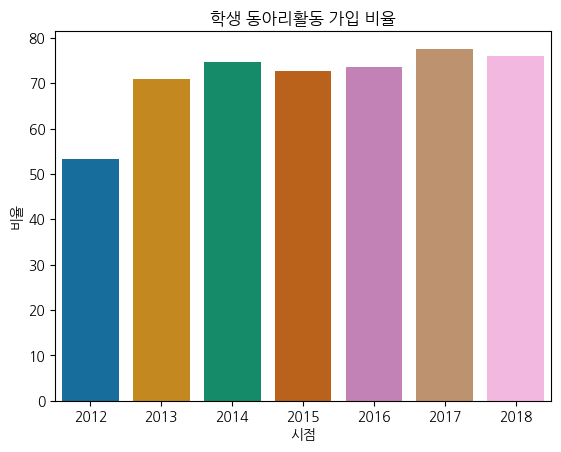

In [31]:
sex_total=sex[sex["성별"]== "합계"]
sns.barplot(data=sex_total, x="시점", y="비율",  palette = sns.color_palette("colorblind"), ci=None)
plt.title("학생 동아리활동 가입 비율")
plt.show()

- 연도별 그래프를 봤을 때 2013년에 상대적으로 비율이 많이 증가함을 알 수있다. 

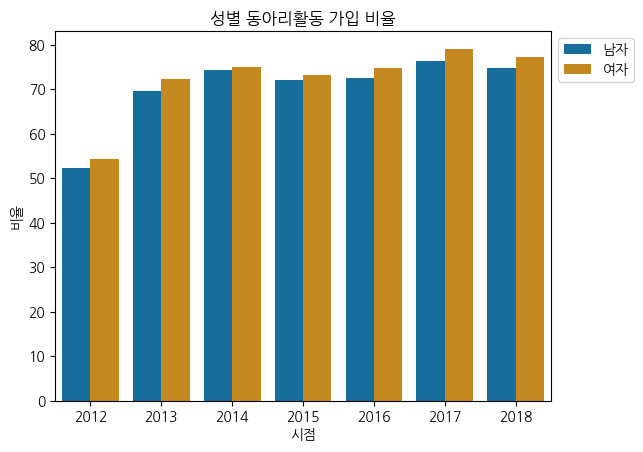

In [32]:
sns.barplot(data=sex_male_female, x="시점", y="비율", hue="성별", palette = sns.color_palette("colorblind"), ci=None)
plt.title("성별 동아리활동 가입 비율")
plt.legend(bbox_to_anchor = (1,1))
plt.show()

- 남녀별 큰 차이가 확인되지 않으나 여자 학생들의 동아리가입 비율이 높다

#### 창체 수업연수와 동아리 가입비율 상관관계

In [33]:
corr

,연도,시도,학교급,교원의 주당 창의적체험활동 수업시수
0,2012,서울,전체,0.89541
1,2013,서울,전체,1.36703
2,2014,서울,전체,1.63813
3,2015,서울,전체,1.57402
4,2016,서울,전체,1.56607
5,2017,서울,전체,1.63918
6,2018,서울,전체,1.61744


In [34]:
sex_total=sex_total.reset_index(drop=True)

In [35]:
#창체 수업연수와 동아리 가입비율 concat
raw=pd.concat([corr,sex_total], axis=1)
raw

,연도,시도,학교급,교원의 주당 창의적체험활동 수업시수,시점,성별,비율
0,2012,서울,전체,0.89541,2012,합계,53.2
1,2013,서울,전체,1.36703,2013,합계,70.9
2,2014,서울,전체,1.63813,2014,합계,74.6
3,2015,서울,전체,1.57402,2015,합계,72.6
4,2016,서울,전체,1.56607,2016,합계,73.6
5,2017,서울,전체,1.63918,2017,합계,77.6
6,2018,서울,전체,1.61744,2018,합계,75.9


In [36]:
raw=raw.drop(columns=["시점","성별"])
raw

,연도,시도,학교급,교원의 주당 창의적체험활동 수업시수,비율
0,2012,서울,전체,0.89541,53.2
1,2013,서울,전체,1.36703,70.9
2,2014,서울,전체,1.63813,74.6
3,2015,서울,전체,1.57402,72.6
4,2016,서울,전체,1.56607,73.6
5,2017,서울,전체,1.63918,77.6
6,2018,서울,전체,1.61744,75.9


<AxesSubplot:>

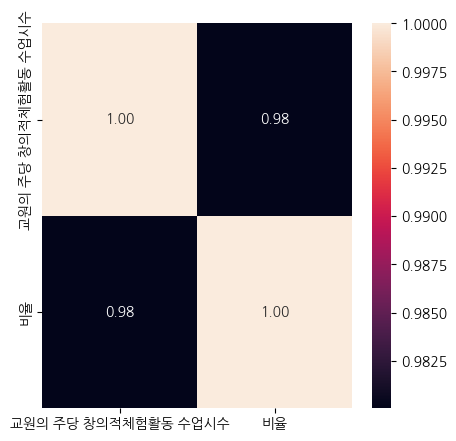

In [37]:
# 창의적 체험활동 수업시수와 동아리 가입비율 상관관계 0.98
plt.figure(figsize=(5,5))
sns.heatmap(data = raw.corr(), annot=True, fmt = '.2f' ,)

#### 학교유형별 동아리 가입비율 시각화

In [38]:
school= group[group['응답자유형별(1)'] == "학교유형별"]

In [39]:
school

,시점,응답자유형별(1),응답자유형별(2),비율
3,2012,학교유형별,초등학교,47.6
4,2012,학교유형별,중학교,58.0
5,2012,학교유형별,일반/특목/자율고,55.3
6,2012,학교유형별,특성화고,47.3
3,2013,학교유형별,초등학교,67.5
4,2013,학교유형별,중학교,73.1
5,2013,학교유형별,일반/특목/자율고,73.1
6,2013,학교유형별,특성화고,64.4
3,2014,학교유형별,초등학교,74.6
4,2014,학교유형별,중학교,75.5


In [40]:
school_special=school[(school['응답자유형별(2)'] == "특성화고") | (school['응답자유형별(2)'] == "일반/특목/자율고")]
school_special

,시점,응답자유형별(1),응답자유형별(2),비율
5,2012,학교유형별,일반/특목/자율고,55.3
6,2012,학교유형별,특성화고,47.3
5,2013,학교유형별,일반/특목/자율고,73.1
6,2013,학교유형별,특성화고,64.4
5,2014,학교유형별,일반/특목/자율고,73.7
6,2014,학교유형별,특성화고,74.3
5,2015,학교유형별,일반/특목/자율고,73.5
6,2015,학교유형별,특성화고,75.0
5,2016,학교유형별,일반/특목/자율고,70.6
6,2016,학교유형별,특성화고,68.6


Text(0.5, 1.0, '학교유형에 따른 동아리 가입 비율')

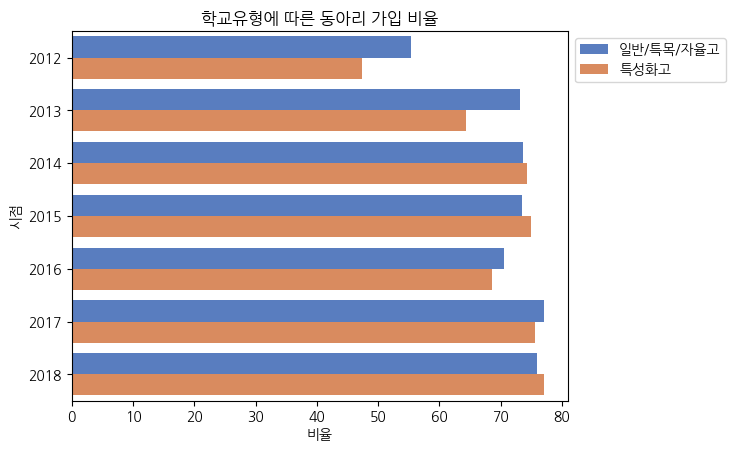

In [41]:
sns.barplot(data=school_special, x="비율", y="시점", hue="응답자유형별(2)", palette = sns.color_palette("muted"), ci=None)
plt.legend(bbox_to_anchor = (1,1))
plt.title("학교유형에 따른 동아리 가입 비율")

- 일반/특목/자율고 와 특성화고 사이의 가입비율을 봤을때 2014년 이후 특성화고의 가입수 비율이 증가한 것으로 확인된다.
- 2013년 이전에는 일반계와 전문계로 이분화 되었으나 이후 특성화고로 변경되면서 특성화고의 동아리 가입 비율 증가된 것으로 예상된다.

#### 경제적 수준별 동아리 가입비율 시각화

In [42]:
economic= group[group['응답자유형별(1)'] == "경제적수준별"]
economic

,시점,응답자유형별(1),응답자유형별(2),비율
14,2012,경제적수준별,상,57.0
15,2012,경제적수준별,중,52.7
16,2012,경제적수준별,하,51.9
14,2013,경제적수준별,상,72.7
15,2013,경제적수준별,중,68.9
16,2013,경제적수준별,하,70.5
17,2014,경제적수준별,상,76.9
18,2014,경제적수준별,중,73.1
19,2014,경제적수준별,하,72.3
14,2015,경제적수준별,상,74.7


Text(0.5, 1.0, '경제적 수준별 동아리활동 참여 비율')

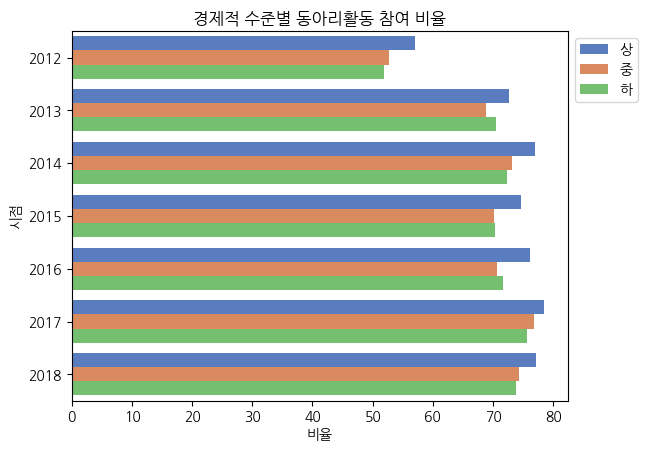

In [43]:
sns.barplot(data=economic, x="비율", y="시점", hue="응답자유형별(2)", palette = sns.color_palette("muted"), ci=None)
plt.legend(bbox_to_anchor = (1,1))
plt.title("경제적 수준별 동아리활동 참여 비율")

In [44]:
region= group[group['응답자유형별(1)'] == "지역규모별"]
region_city= region[(region['응답자유형별(2)'] == "대도시")|(region['응답자유형별(2)']=='중소도시')]
region_rural= region[(region['응답자유형별(2)'] == "대도시")|(region['응답자유형별(2)']=='읍/면')]

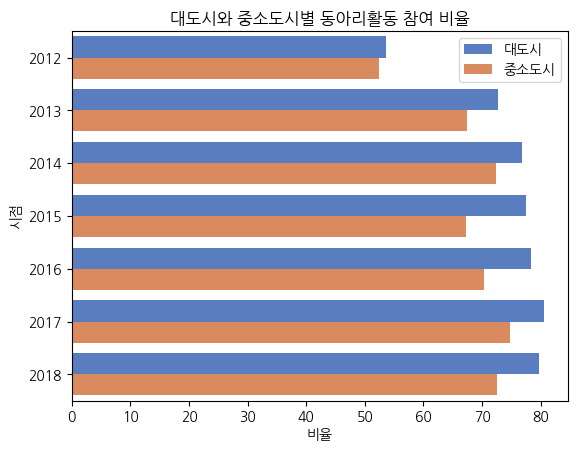

In [45]:
sns.barplot(data=region_city, x="비율", y="시점", hue="응답자유형별(2)", palette = sns.color_palette("muted"), ci=None)
plt.legend(bbox_to_anchor = (1,1))
plt.title("대도시와 중소도시별 동아리활동 참여 비율")
plt.show()

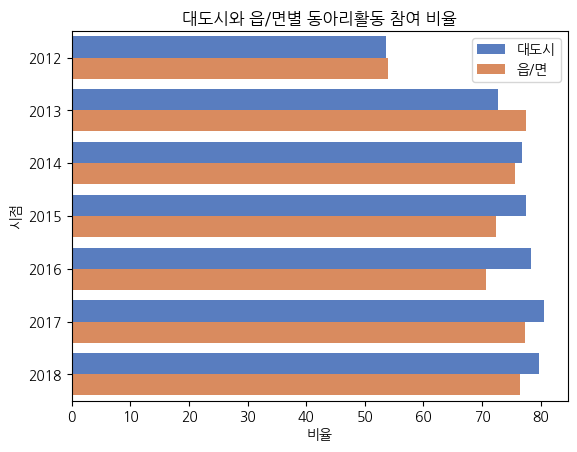

In [46]:
sns.barplot(data=region_rural, x="비율", y="시점", hue="응답자유형별(2)", palette = sns.color_palette("muted"), ci=None)
plt.legend(bbox_to_anchor = (1,1))
plt.title("대도시와 읍/면별 동아리활동 참여 비율")
plt.show()

- 대도시와 중소도시를 비교했을 때 대도시가 항상 동아리가입자비율이 높지만, 
- 대도시와 읍면을 비교했을 때 2013년도 읍/면의 비율이 더 높아 확인해 볼 필요가 있다.

Text(0.5, 1.0, '가족형태별 동아리활동 참여 비율')

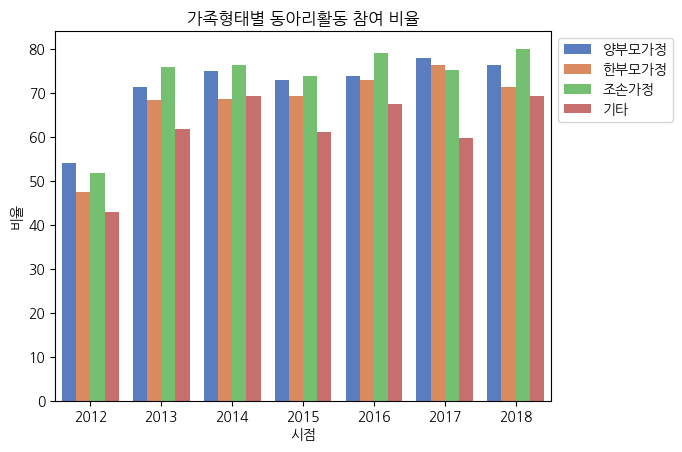

In [47]:
familytype= group[group['응답자유형별(1)'] == "가족유형별"]

sns.barplot(data=familytype, x="시점", y="비율", hue="응답자유형별(2)", palette = sns.color_palette("muted"), ci=None)
plt.legend(bbox_to_anchor = (1,1))
plt.title("가족형태별 동아리활동 참여 비율")

In [48]:
familytype_single= familytype[(familytype['응답자유형별(2)'] == "양부모가정")|(familytype['응답자유형별(2)']=="한부모가정")]
familytype_grandparents= familytype[(familytype['응답자유형별(2)'] == "양부모가정")|(familytype['응답자유형별(2)']=="조손가정")]

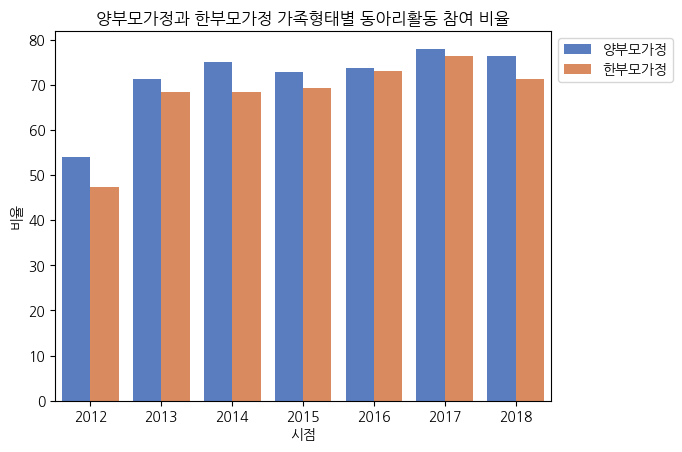

In [49]:
sns.barplot(data=familytype_single, x="시점", y="비율", hue="응답자유형별(2)", palette = sns.color_palette("muted"), ci=None)
plt.legend(bbox_to_anchor = (1,1))
plt.title("양부모가정과 한부모가정 가족형태별 동아리활동 참여 비율")
plt.show()

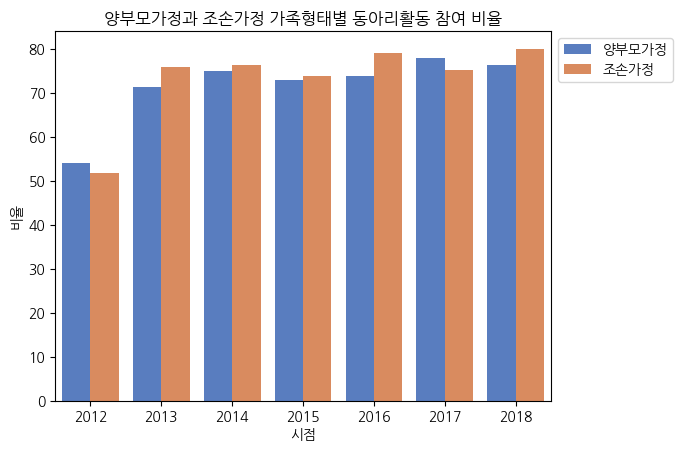

In [50]:
sns.barplot(data=familytype_grandparents, x="시점", y="비율", hue="응답자유형별(2)", palette = sns.color_palette("muted"), ci=None)
plt.legend(bbox_to_anchor = (1,1))
plt.title("양부모가정과 조손가정 가족형태별 동아리활동 참여 비율")
plt.show()

- 2012년 2017년을 제외하고는 모두 조손가정의 동아리 활동 참여비율이 높게 나타난다.

# 결론
- 창체수업시간 증가에 따라 동아리 가입자 비율도 늘어나고 있다. 
    =>상관계수 0.98
- 2013년도에 특히 증가세가 두드러지고 있다. 
     ==> "창체활동 중 하나였던 스포츠클럽활동을 따로 분리하여 의무화 시킴" / 2012년도 이후 주5일제 시행으로 주말 활동프로그램의 증가가 두드러짐 
     >https://news.seoul.go.kr/welfare/archives/306939
     >https://www.kice.re.kr/upload/brochureBoard/7/2021/05/1622172496674_56140382171416185.pdf
- 동아리가입비율에서 특이한 점은 고등학교 유형별 특성화고에서 2014년도부터 일반/자율/특목고를 앞지르는데 이후 가입자 비율은 비슷해지고 있다.
    >2012년도 전문계 고등학교에서 특성화고로 명칭변경되면서 세분화된 맞춤 전공 지원
    ```
    학년에 관계없이 방과 후 수업 시간에는 학생들이 적성에 따라 전공 관련 자격증이나 전문교과 등 부족한 부분을 보완할 수 있도록 돕고 있으며, 이외에도 학교에서 각종 공모전, 대회에 관한 소식을 빠짐없이 전해 학생들이 진학과 취업의 꿈에 한발 가까이 다가갈 수 있도록 하고 있습니다.```
    
    https://if-blog.tistory.com/1609